# House Prices: Advanced Regression Techniques
## Exploratory Data Analysis

In which we take a high-level look at the data we have, and some of its key properties. The purpose of this step is to get acquainted with the data in some detail so that we get a good feel for what we'll be dealing with when we start the work of cleaning, pre-processing, feature selection, and model selection.

A detailed description of the variables with keys and descriptions for categorical variables is available here:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/download/data_description.txt<br>

## Import useful libraries and prepare data for exploration

In [1]:
# Import libraries
import numpy as np
from scipy import stats
import pandas as pd
import pandas.api.types as ptypes
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import datasets
df_raw = pd.read_csv("train.csv",low_memory=False)
df_test = pd .read_csv("test.csv",low_memory=False)

In [3]:
# We'd like to combine the 2 datasets for initial analysis, but notice that they are not the same shape
# since the test data has no SalePrice column!
print("df_raw shape: ", df_raw.shape, "df_test shape: ", df_test.shape)

df_raw shape:  (1460, 81) df_test shape:  (1459, 80)


In [4]:
# Create and fill the SalePrice column for df_test with 0 to resolve the above issue:
df_test["SalePrice"] = 0

In [5]:
df_raw["Source"] = "train"
df_test["Source"] = "test"
df = df_raw.append(df_test)

## Get a high-level look at what we've got

In [6]:
# What does our data look like roughly?
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities   ...   PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub   ...      NaN   NaN         NaN       0      2   
1         Lvl    AllPub   ...      NaN   NaN         NaN       0      5   
2         Lvl    AllPub   ...      NaN   NaN         NaN       0      9   
3         Lvl    AllPub   ...      NaN   NaN         NaN       0      2   
4         Lvl    AllPub   ...      NaN   NaN         NaN       0     12   

  YrSold SaleType  SaleCondition  SalePrice  Source  
0   2008       WD         Normal     208500   train  
1   2007       WD         Normal     181500   train  
2   2008       WD         Normal     223500   train  
3   2006       WD        Abnorml     140000   train  
4   2008       WD         Normal     250000   train  

[5 rows x 82 columns]

In [7]:
# What columns are included in our dataset? There are a LOT!
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
# It's not a bad idea just to export to Excel so it's easier to "browse"...
df.to_excel("initial_exploration.xlsx")
# Have a look at each column in Excel with the help of the descriptions supplied in 
# data_descriptions.txt on Kaggle and answer the following 3 questions?
# 1) Do I understand what the data is telling us about each house?
# 2) What is the data type, e.g. numeric, categorical, ordinal? 
# 3) Does the data have missing values?
# This step will ensure that numeric values that actually represent categories 
# are not misunderstood, e.g. 1, 2, 3 may refer to a number of bedrooms (numeric)  
# or may refer to a ranking like good, average, poor (categorical)

In [9]:
# But for ease of use in our notebook a function to display more rows and more columns is going to come in handy!
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

## Looking at the target variable

In [10]:
# The target variable is SalePrice - let's see the basic statistics
# It's important to keep these in mind when looking at charts later 
# so you have a sense of how to evaluate the information you're viewing
df.loc[df["Source"] == "train", "SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [11]:
# What about the median? Somewhat lower than the mean, therefore we'd expect to see
# that the data is a bit skewed...
df.loc[df["Source"] == "train", "SalePrice"].median()

163000.0

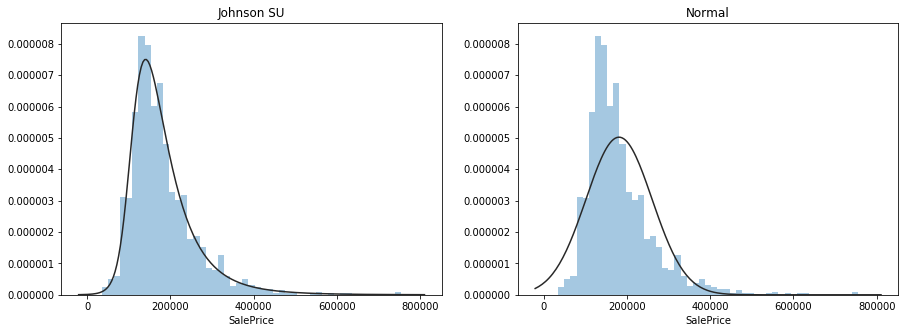

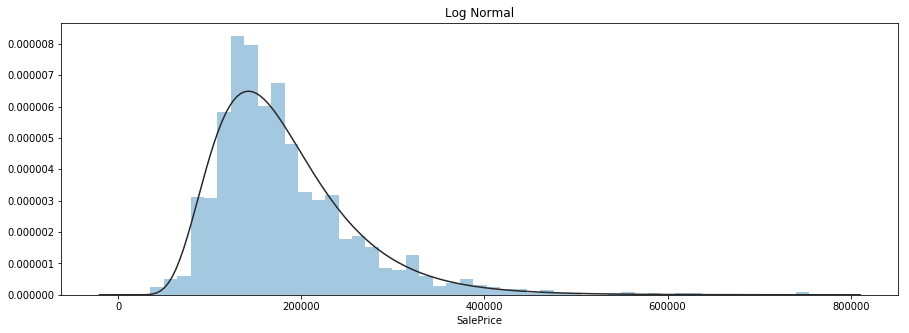

In [12]:
# So let's see what distribution fits our target variable SalePrice best - it's skewed right
# which means we have a lot of outliers on the expensive side, that's why the median is lower than the mean:
plt.rcParams["figure.figsize"] = (15,5)
plt.subplot(121); plt.title("Johnson SU")
sns.distplot(df.loc[df["Source"] == "train", "SalePrice"],kde=False,fit=stats.johnsonsu)
plt.subplot(122); plt.title("Normal")
sns.distplot(df.loc[df["Source"] == "train", "SalePrice"], kde=False, fit=stats.norm)
plt.figure(3); plt.title("Log Normal")
sns.distplot(df.loc[df["Source"] == "train", "SalePrice"], kde=False, fit=stats.lognorm)
plt.show()
# The prices are skewed right and some outiliers are above 500,000

## Looking at the metric
We are told at https://www.kaggle.com/c/house-prices-advanced-regression-techniques#evaluation that our predictions will be evaluated as follows:<br>
"Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the <b>logarithm of the observed sales price</b>. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)"

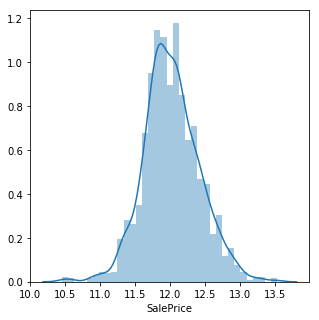

In [13]:
# Let's check what that distribution will look like for the sake of comparison and understanding
# We can see that it is a more normal distribution
plt.rcParams["figure.figsize"] = (5, 5)
sns.distplot(np.log(df.loc[df["Source"] == "train", "SalePrice"]))
plt.show()

## Looking at the variables available for prediction

In [14]:
# Extract quantitative vs qualitative variables
quant = [i for i in df.columns if df.dtypes[i] != 'object']
quant.remove('Id')
quant.remove('SalePrice')
#qualit = [i for i in df.columns if df.dtypes[i] == 'object']
#qualit.remove('Source')

### Investigating numeric data

In [15]:
# Let's take a look at the univariate analysis of continuous variables - the key stats:
display_all(df.describe().transpose())

count          mean            std     min     25%      50%  \
Id             2919.0   1460.000000     842.787043     1.0   730.5   1460.0   
MSSubClass     2919.0     57.137718      42.517628    20.0    20.0     50.0   
LotFrontage    2433.0     69.305795      23.344905    21.0    59.0     68.0   
LotArea        2919.0  10168.114080    7886.996359  1300.0  7478.0   9453.0   
OverallQual    2919.0      6.089072       1.409947     1.0     5.0      6.0   
OverallCond    2919.0      5.564577       1.113131     1.0     5.0      5.0   
YearBuilt      2919.0   1971.312778      30.291442  1872.0  1953.5   1973.0   
YearRemodAdd   2919.0   1984.264474      20.894344  1950.0  1965.0   1993.0   
MasVnrArea     2896.0    102.201312     179.334253     0.0     0.0      0.0   
BsmtFinSF1     2918.0    441.423235     455.610826     0.0     0.0    368.5   
BsmtFinSF2     2918.0     49.582248     169.205611     0.0     0.0      0.0   
BsmtUnfSF      2918.0    560.772104     439.543659     0.0   220.0    467.0   
TotalBsmtSF    2918.0   1051.777587     440.766258     0.0   793.0    989.5   
1stFlrSF       2919.0   1159.581706     392.362079   334.0   876.0   1082.0   
2ndFlrSF       2919.0    336.483727     428.701456     0.0     0.0      0.0   
LowQualFinSF   2919.0      4.694416      46.396825     0.0     0.0      0.0   
GrLivArea      2919.0   1500.759849     506.051045   334.0  1126.0   1444.0   
BsmtFullBath   2917.0      0.429894       0.524736     0.0     0.0      0.0   
BsmtHalfBath   2917.0      0.061364       0.245687     0.0     0.0      0.0   
FullBath       2919.0      1.568003       0.552969     0.0     1.0      2.0   
HalfBath       2919.0      0.380267       0.502872     0.0     0.0      0.0   
BedroomAbvGr   2919.0      2.860226       0.822693     0.0     2.0      3.0   
KitchenAbvGr   2919.0      1.044536       0.214462     0.0     1.0      1.0   
TotRmsAbvGrd   2919.0      6.451524       1.569379     2.0     5.0      6.0   
Fireplaces     2919.0      0.597122       0.646129     0.0     0.0      1.0   
GarageYrBlt    2760.0   1978.113406      25.574285  1895.0  1960.0   1979.0   
GarageCars     2918.0      1.766621       0.761624     0.0     1.0      2.0   
GarageArea     2918.0    472.874572     215.394815     0.0   320.0    480.0   
WoodDeckSF     2919.0     93.709832     126.526589     0.0     0.0      0.0   
OpenPorchSF    2919.0     47.486811      67.575493     0.0     0.0     26.0   
EnclosedPorch  2919.0     23.098321      64.244246     0.0     0.0      0.0   
3SsnPorch      2919.0      2.602261      25.188169     0.0     0.0      0.0   
ScreenPorch    2919.0     16.062350      56.184365     0.0     0.0      0.0   
PoolArea       2919.0      2.251799      35.663946     0.0     0.0      0.0   
MiscVal        2919.0     50.825968     567.402211     0.0     0.0      0.0   
MoSold         2919.0      6.213087       2.714762     1.0     4.0      6.0   
YrSold         2919.0   2007.792737       1.314964  2006.0  2007.0   2008.0   
SalePrice      2919.0  90491.588215  106496.379333     0.0     0.0  34900.0   

                    75%       max  
Id               2189.5    2919.0  
MSSubClass         70.0     190.0  
LotFrontage        80.0     313.0  
LotArea         11570.0  215245.0  
OverallQual         7.0      10.0  
OverallCond         6.0       9.0  
YearBuilt        2001.0    2010.0  
YearRemodAdd     2004.0    2010.0  
MasVnrArea        164.0    1600.0  
BsmtFinSF1        733.0    5644.0  
BsmtFinSF2          0.0    1526.0  
BsmtUnfSF         805.5    2336.0  
TotalBsmtSF      1302.0    6110.0  
1stFlrSF         1387.5    5095.0  
2ndFlrSF          704.0    2065.0  
LowQualFinSF        0.0    1064.0  
GrLivArea        1743.5    5642.0  
BsmtFullBath        1.0       3.0  
BsmtHalfBath        0.0       2.0  
FullBath            2.0       4.0  
HalfBath            1.0       2.0  
BedroomAbvGr        3.0       8.0  
KitchenAbvGr        1.0       3.0  
TotRmsAbvGrd        7.0      15.0  
Fireplaces          1.0       4.0 

In [16]:
# Now let's get our data into a format suitable for plotting
melted = pd.melt(df, value_vars=quant)
melted.head()

variable  value
0  MSSubClass   60.0
1  MSSubClass   20.0
2  MSSubClass   60.0
3  MSSubClass   70.0
4  MSSubClass   60.0

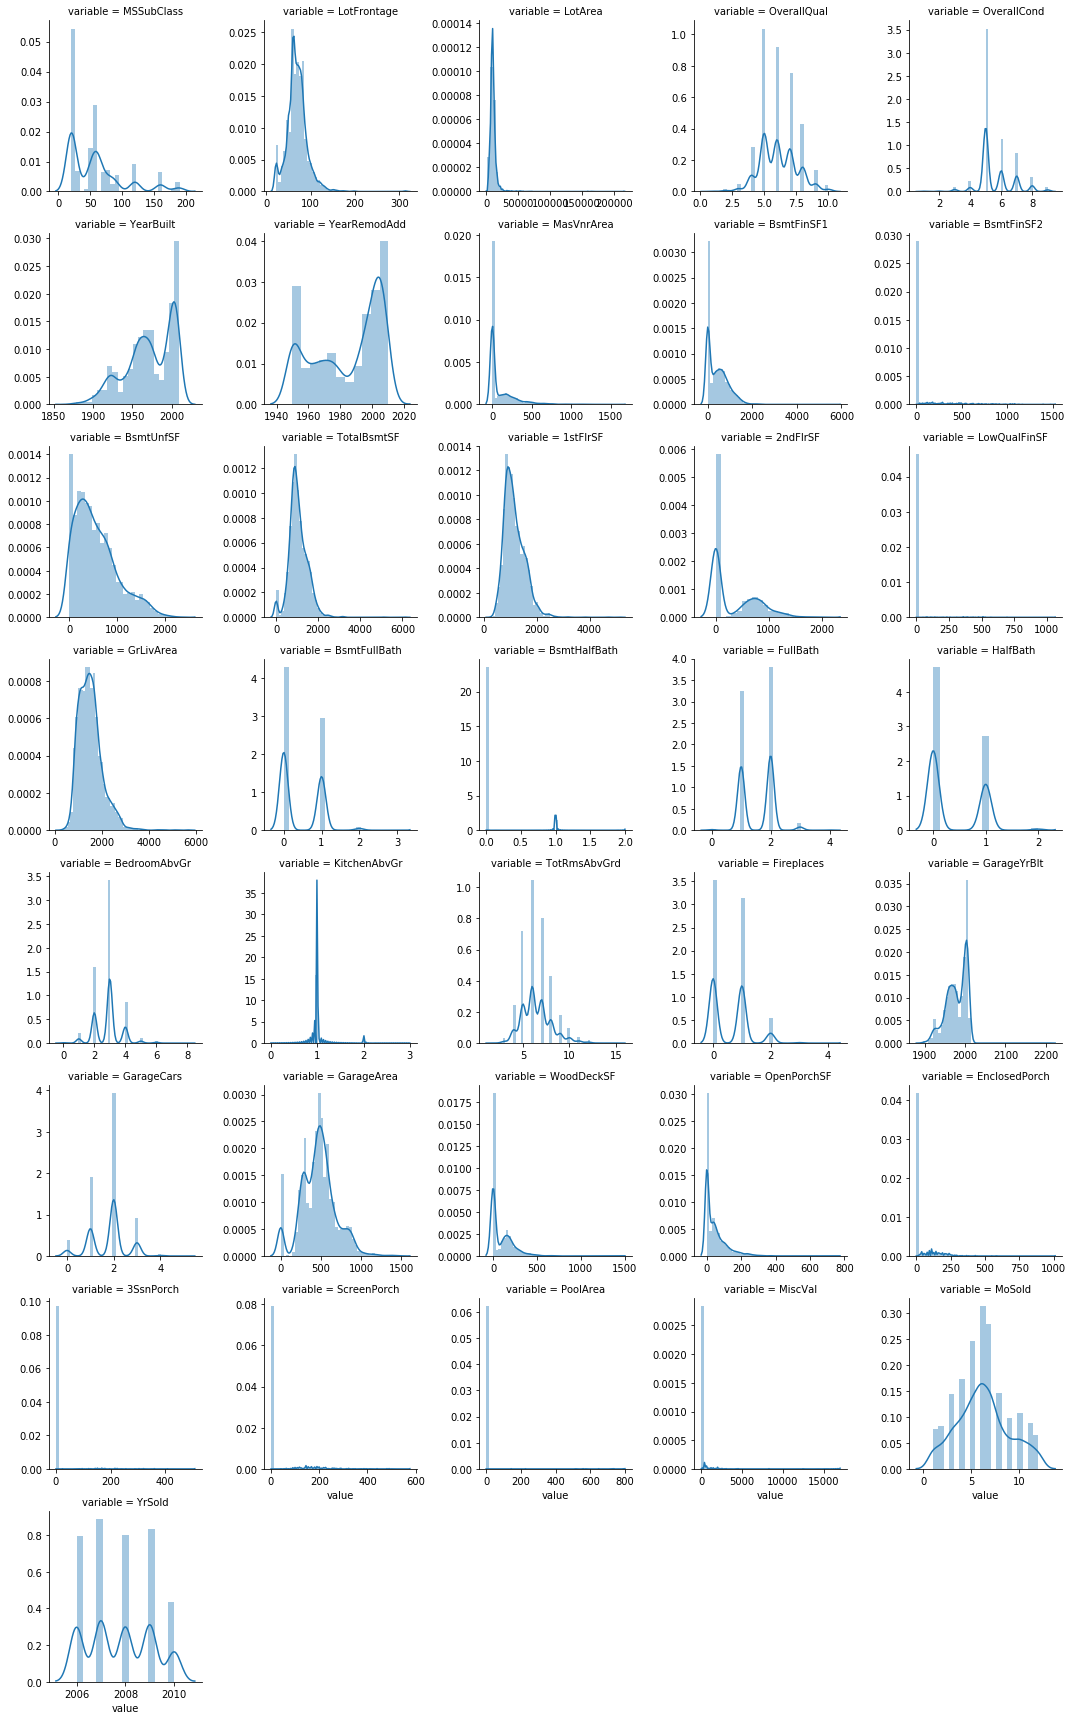

In [17]:
# And then we can have a look at the distributions:
m2 = sns.FacetGrid(melted, col='variable', col_wrap=5, sharex=False, sharey=False)
m2 = m2.map(sns.distplot, 'value')
plt.show()
# What can we get from viewing the data like this?
# - High numbers of 0 values (usually indicating absence of a certain feature)
# - Normal distributions
# - Skewed distributions
# - Numeric data that actually looks more like categorical data
# - Features that have similar distributions like 1stFlrSF, TotalBsmtSF,LotFrontage,GrLivearea, SalePrice

In [18]:
# From the analysis done in Excel and the distributions we see above we can identify
# more precisely which are our numeric fields of interest:
num_of_interest = [
    "LotFrontage", 
    "LotArea", 
    "MasVnrArea", 
    "BsmtFinSF1", 
    "BsmtFinSF2", 
    "BsmtUnfSF", 
    "TotalBsmtSF", 
    "1stFlrSF", 
    "2ndFlrSF", 
    "LowQualFinSF", 
    "GrLivArea", 
    "GarageArea", 
    "WoodDeckSF", 
    "OpenPorchSF", 
    "EnclosedPorch", 
    "3SsnPorch", 
    "ScreenPorch", 
    "PoolArea",
]

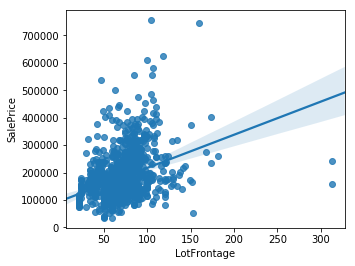

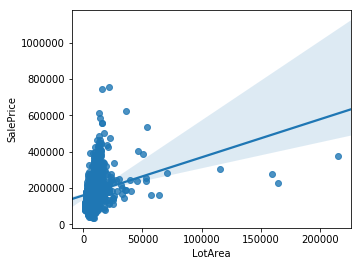

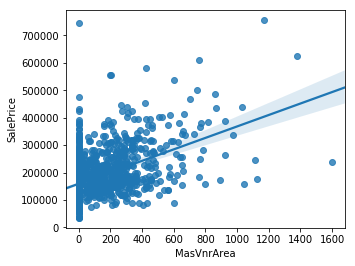

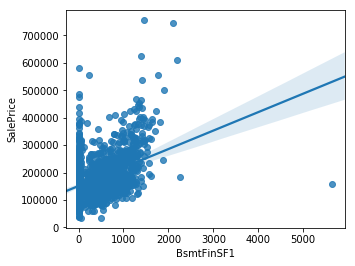

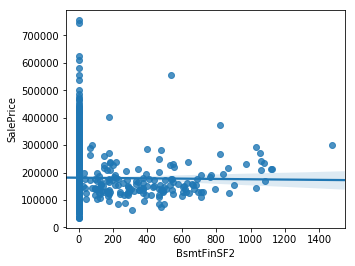

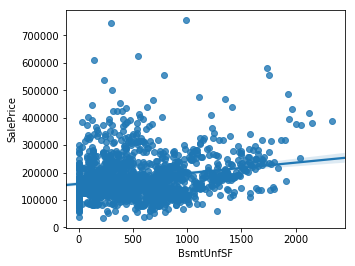

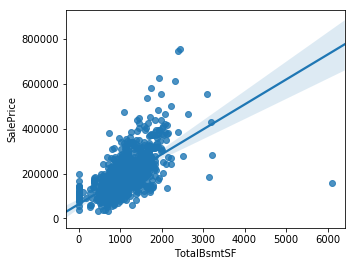

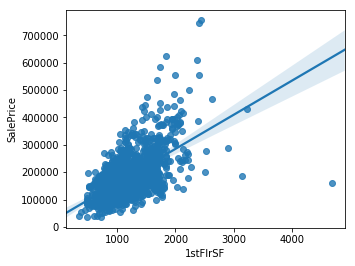

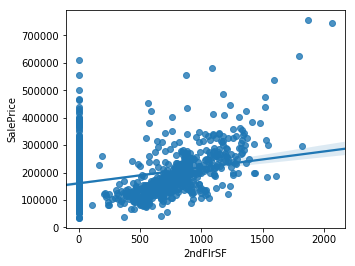

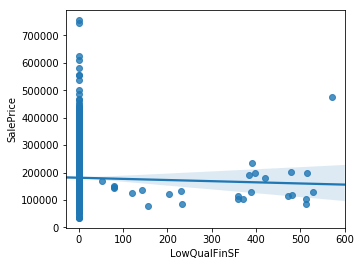

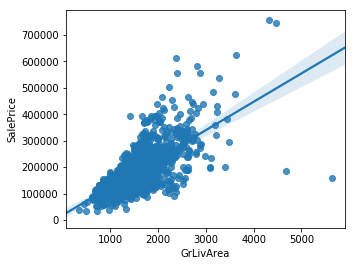

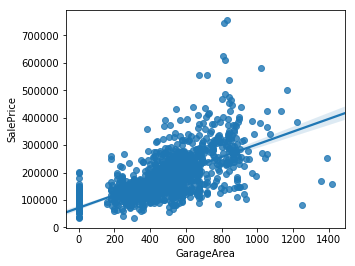

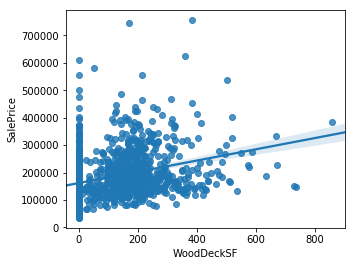

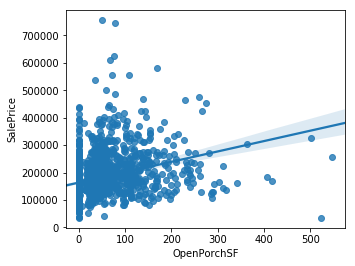

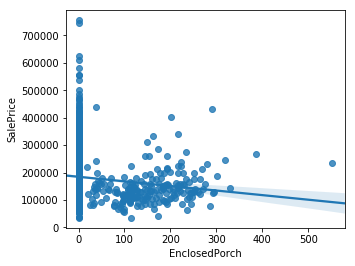

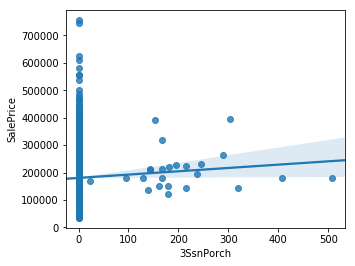

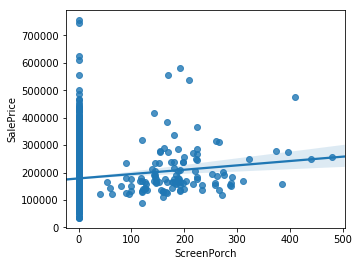

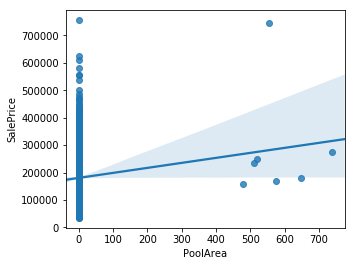

In [19]:
# Seaborn has a nice option sns.regplot() which can help us visualize linear relationships
# between the variables available for prediction and the target variable, so let's look:

# We can only look at linear relationships between source and target on the training data
df_train = df[df["Source"] == "train"].copy()
df_train.drop(columns="Source", inplace = True)

# Plot using the training data with SalePrice available
plt.rcParams['figure.figsize'] = (5,4)
for i in range(len(num_of_interest)):
    var = num_of_interest[i]
    data = pd.concat([df_train["SalePrice"], df_train[var]], axis=1)
    sns.regplot(data = data, x=var, y="SalePrice")
    plt.show()
# From the below MasVnrArea, BsmtFinSF1, TotalBsmtSF, 1stFlrSF, GrLivArea 
# appear to be most highly correlated with SalePrice
# There are also a lot of data points are located on x = 0 which may indicate the 
# absence of that feature in the house (e.g. no basement)
# Features such as TotalBsmtSF, GrLivArea and GarageArea have a big spread

In [20]:
# We had different interpretations of numerical values of interest in the team - which can happen because
# the data is not always "clear cut"! Let's look at it this way:
num_of_interest = [
    'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'
]

In [21]:
# Here we get a list of numeric values strongly correlated with sale price
df_num_corr = df_train[num_of_interest].corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
strong_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There are a total of {} strongly correlated values with SalePrice:\n{}".format(len(strong_features_list), strong_features_list))

There are a total of 8 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64


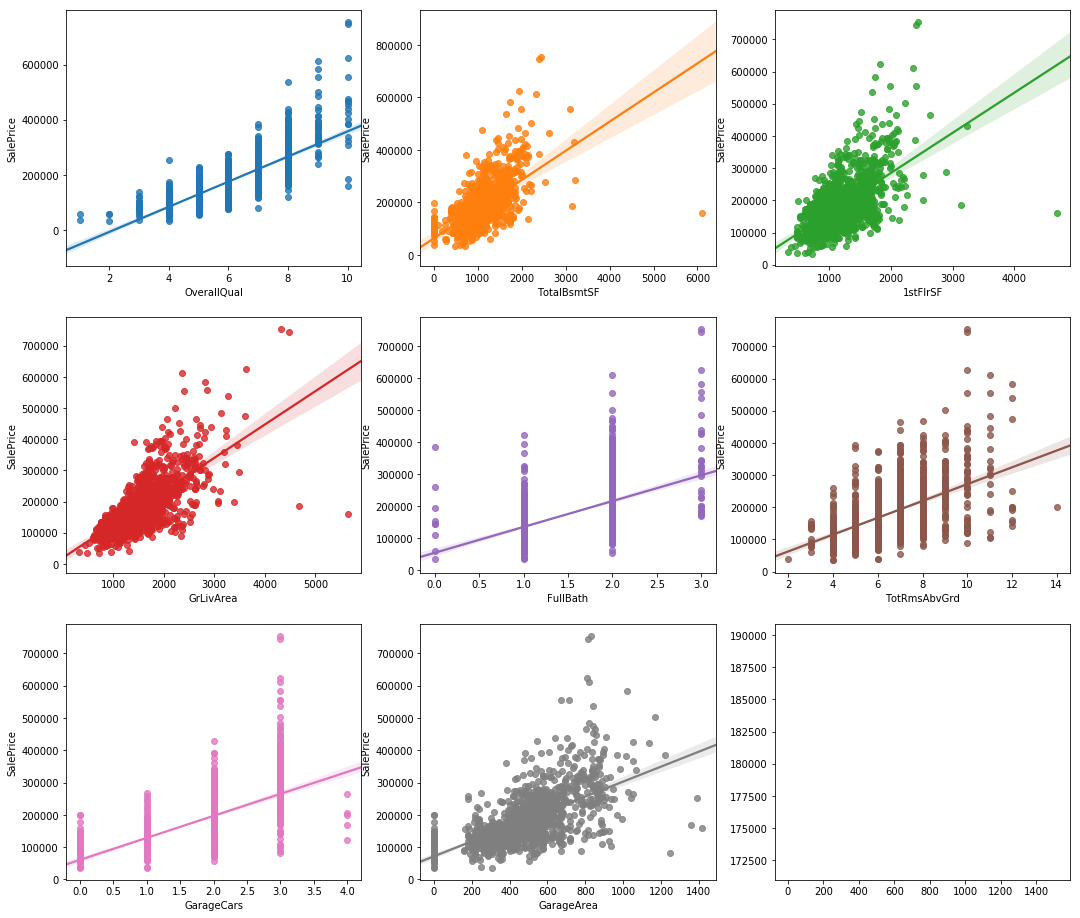

In [22]:
# And we can conveniently plot the distributions of these strongly correlated features
features_to_analyse = [x for x in num_of_interest if x in strong_features_list]
features_to_analyse.append('SalePrice')
features_to_analyse
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 16))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='SalePrice', data=df_train[features_to_analyse], ax=ax)

### Investigating categorical data

In [23]:
# Let's have a look at some categories of interest - this list has been refined based on 
# observation in Excel and analysis of which variables are *actually* numeric vs categorical:
cat_of_interest = [
    "MSSubClass", 
    "MSZoning", 
    "Street", 
    "Alley", 
    "LotShape", 
    "LandContour", 
    "Utilities", 
    "LotConfig", 
    "LandSlope", 
    "Neighborhood", 
    "Condition1", 
    "Condition2", 
    "BldgType", 
    "HouseStyle", 
    "OverallQual", 
    "OverallCond", 
    "RoofStyle", 
    "RoofMatl", 
    "Exterior1st", 
    "Exterior2nd", 
    "MasVnrType", 
    "ExterQual", 
    "ExterCond", 
    "Foundation", 
    "BsmtQual", 
    "BsmtCond", 
    "BsmtExposure", 
    "BsmtFinType1", 
    "BsmtFinType2", 
    "Heating", 
    "HeatingQC", 
    "CentralAir", 
    "Electrical", 
    "BsmtFullBath", 
    "BsmtHalfBath", 
    "FullBath", 
    "HalfBath", 
    "BedroomAbvGr", 
    "KitchenAbvGr", 
    "KitchenQual", 
    "TotRmsAbvGrd", 
    "Functional", 
    "Fireplaces", 
    "FireplaceQu", 
    "GarageType", 
    "GarageFinish", 
    "GarageCars", 
    "GarageQual", 
    "GarageCond", 
    "PavedDrive", 
    "PoolQC", 
    "Fence", 
    "MiscFeature", 
    "MoSold", 
    "SaleType", 
    "SaleCondition"
]

In [24]:
# Let's take a look at the univariate analysis of categorical variables - the key stats:
display_all(df[cat_of_interest].describe(include=['object', 'bool']).transpose())

count unique      top  freq
MSZoning       2915      5       RL  2265
Street         2919      2     Pave  2907
Alley           198      2     Grvl   120
LotShape       2919      4      Reg  1859
LandContour    2919      4      Lvl  2622
Utilities      2917      2   AllPub  2916
LotConfig      2919      5   Inside  2133
LandSlope      2919      3      Gtl  2778
Neighborhood   2919     25    NAmes   443
Condition1     2919      9     Norm  2511
Condition2     2919      8     Norm  2889
BldgType       2919      5     1Fam  2425
HouseStyle     2919      8   1Story  1471
RoofStyle      2919      6    Gable  2310
RoofMatl       2919      8  CompShg  2876
Exterior1st    2918     15  VinylSd  1025
Exterior2nd    2918     16  VinylSd  1014
MasVnrType     2895      4     None  1742
ExterQual      2919      4       TA  1798
ExterCond      2919      5       TA  2538
Foundation     2919      6    PConc  1308
BsmtQual       2838      4       TA  1283
BsmtCond       2837      4       TA  2606
BsmtExposure   2837      4       No  1904
BsmtFinType1   2840      6      Unf   851
BsmtFinType2   2839      6      Unf  2493
Heating        2919      6     GasA  2874
HeatingQC      2919      5       Ex  1493
CentralAir     2919      2        Y  2723
Electrical     2918      5    SBrkr  2671
KitchenQual    2918      4       TA  1492
Functional     2917      7      Typ  2717
FireplaceQu    1499      5       Gd   744
GarageType     2762      6   Attchd  1723
GarageFinish   2760      3      Unf  1230
GarageQual     2760      5       TA  2604
GarageCond     2760      5       TA  2654
PavedDrive     2919      3        Y  2641
PoolQC           10      3       Ex     4
Fence           571      4    MnPrv   329
MiscFeature     105      4     Shed    95
SaleType       2918      9       WD  2525
SaleCondition  2919      6   Normal  2402

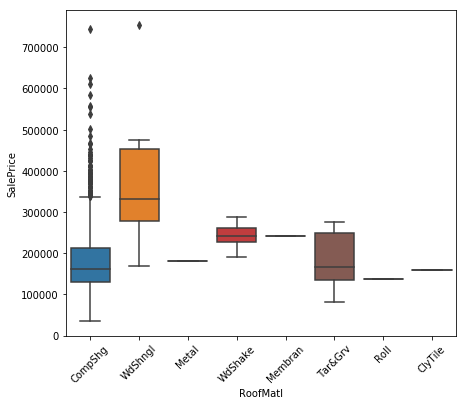

In [25]:
# There's a lot of categorical data to analyse! Quite a number of tutorials suggest the boxplot
# or violinplot for visualizing this data, and this is not a bad method, especially when it comes to seeing
# outliers in a particular category. For example here we see RoofMatl = CompShg has many many outliers. 
# This doesn't give us a good sense of how *many* observations there are in a particular category - 
# you might start getting excited about the relatively higher price of wood shingle houses compared with others...

plt.rcParams['figure.figsize'] = (7, 6)
chart = sns.boxplot(x = df_train["RoofMatl"], y=df_train["SalePrice"])
for item in chart.get_xticklabels():
        item.set_rotation(45)
plt.show()

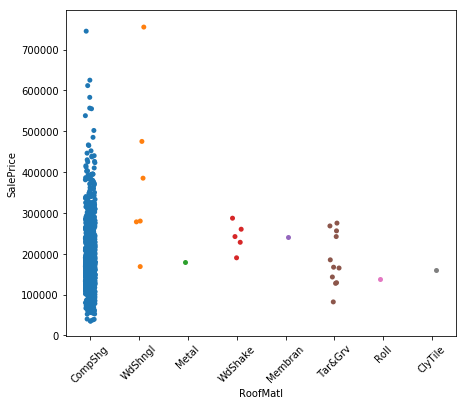

In [26]:
# Using the stripplot you can see both the correlation between categories and price *as well as* the number
# of observations of each per category.
# We can also easily see that wood shingles are not *that* exciting as there are actually so few
# houses with this type of roofing material it would be hard to really draw conclusions of any kind...
chart = sns.stripplot(x = df_train["RoofMatl"], y=df_train["SalePrice"])
for item in chart.get_xticklabels():
        item.set_rotation(45)
plt.show()

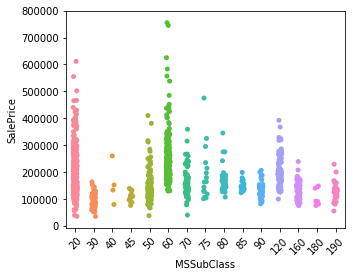

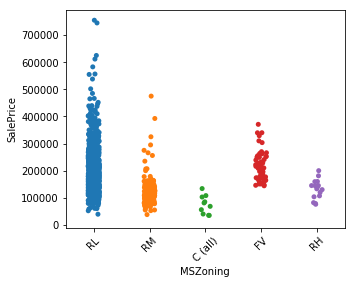

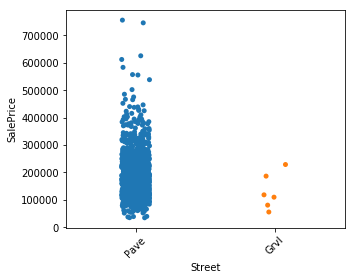

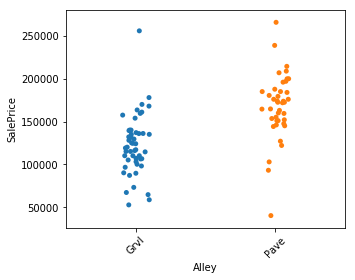

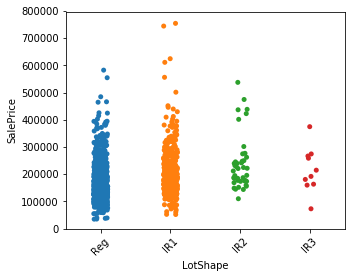

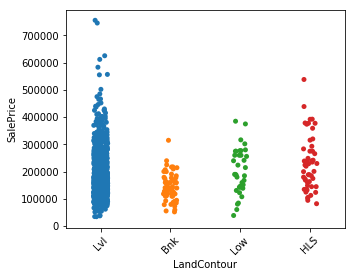

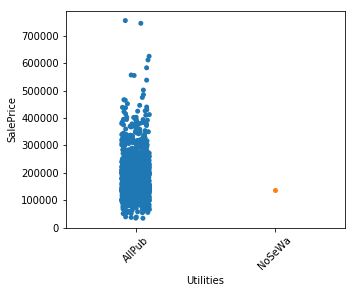

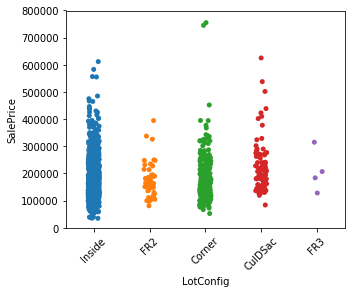

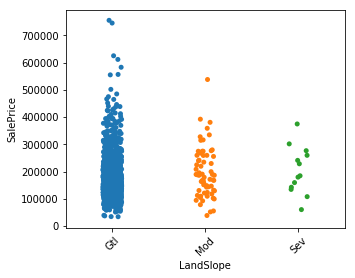

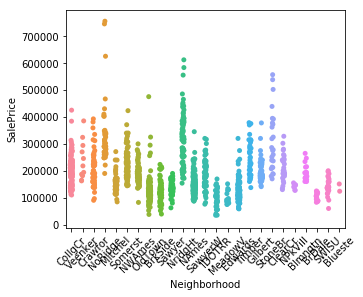

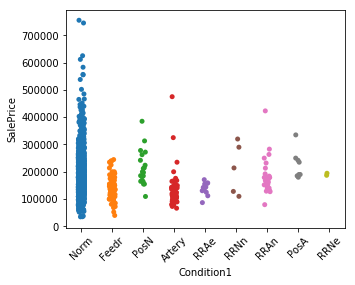

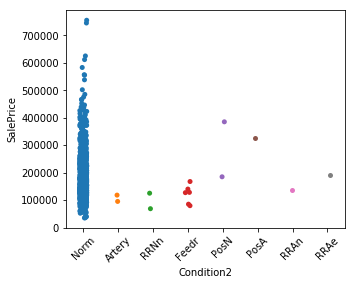

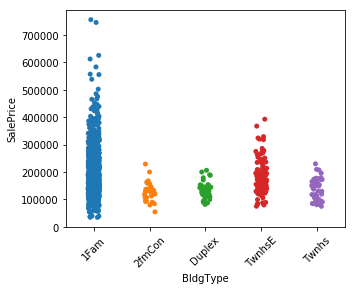

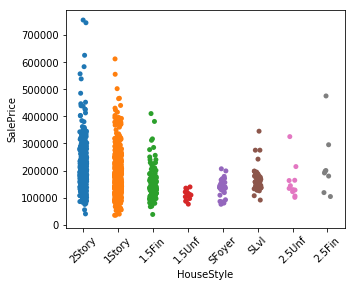

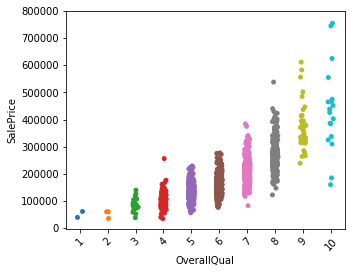

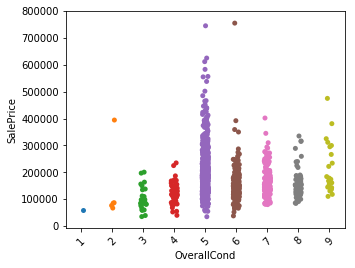

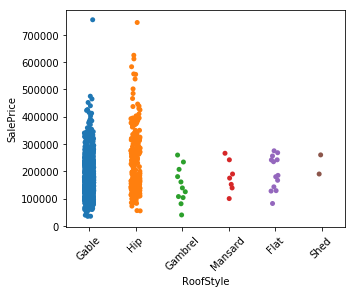

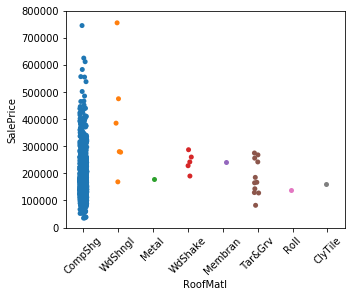

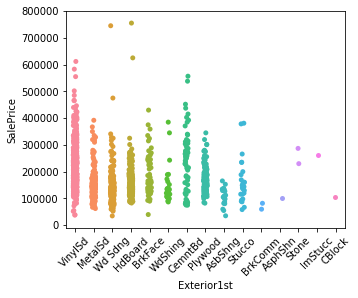

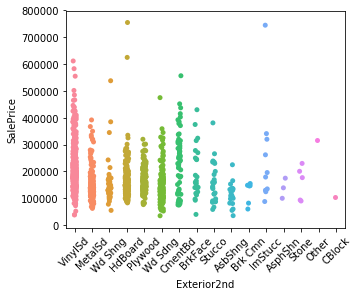

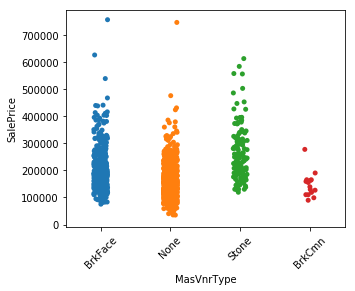

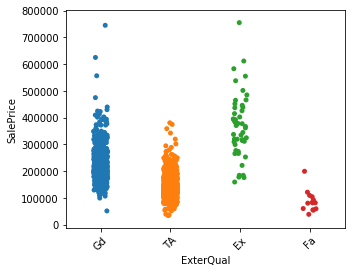

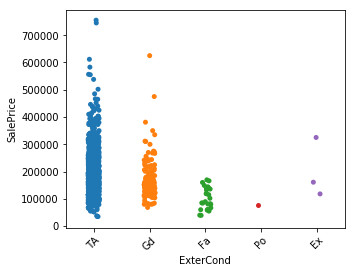

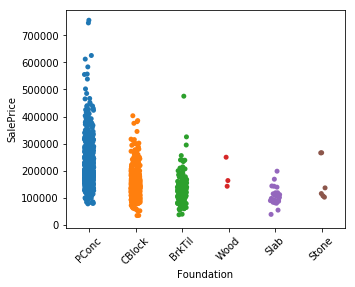

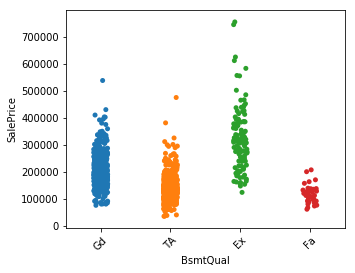

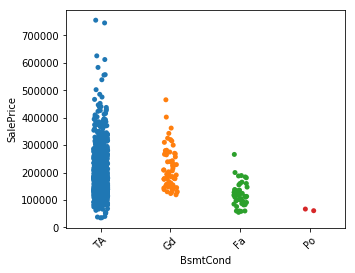

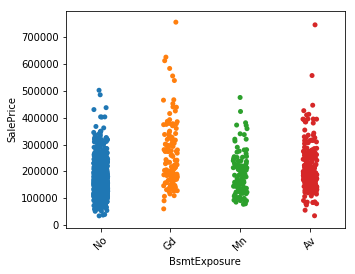

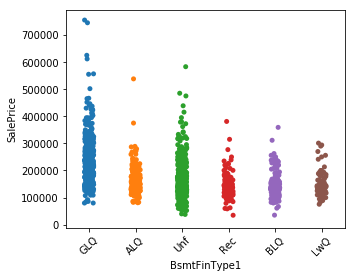

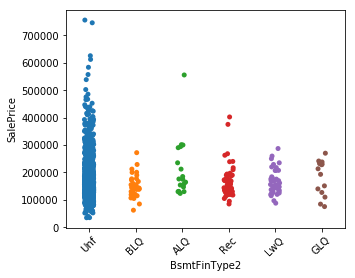

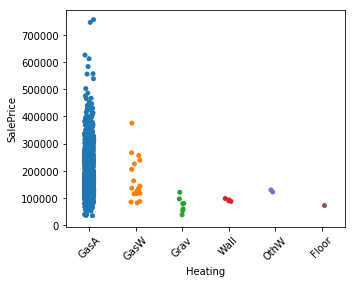

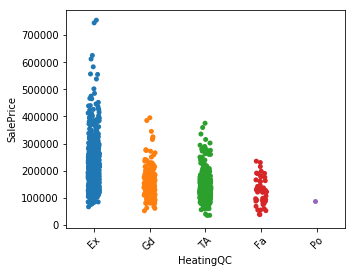

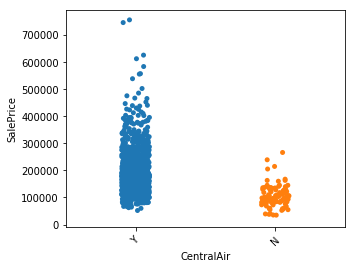

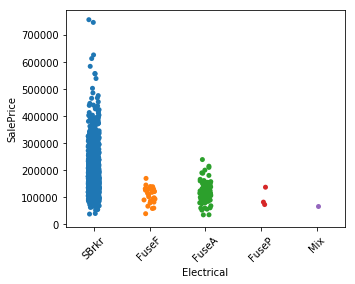

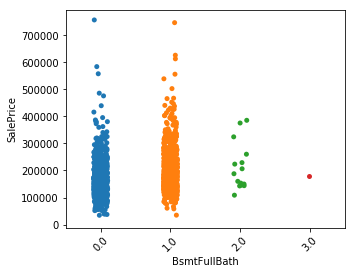

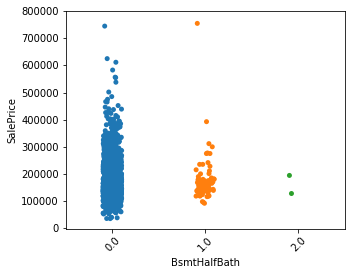

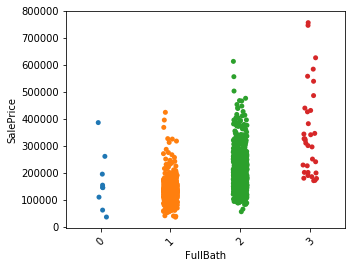

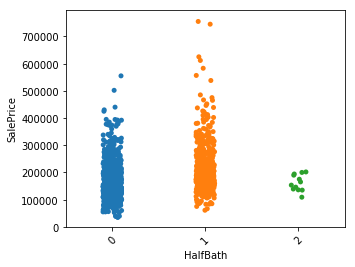

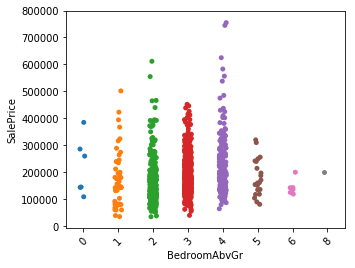

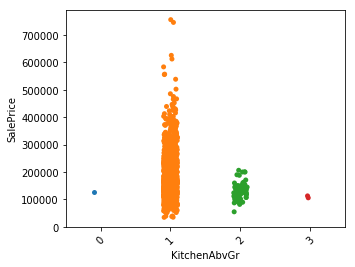

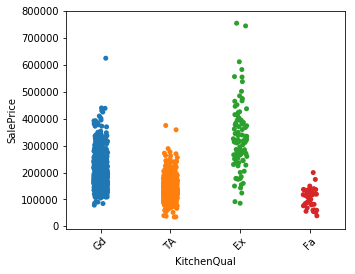

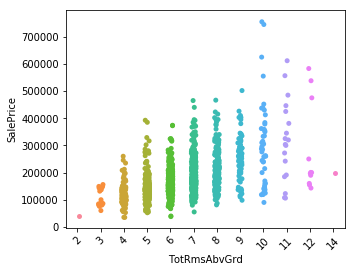

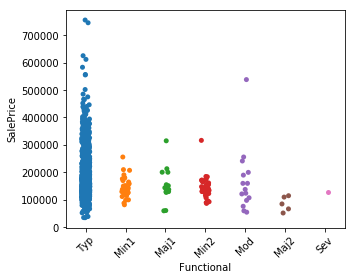

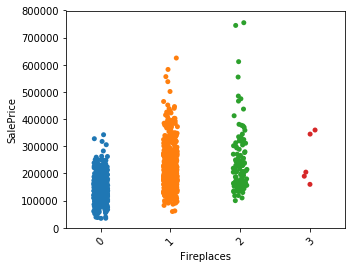

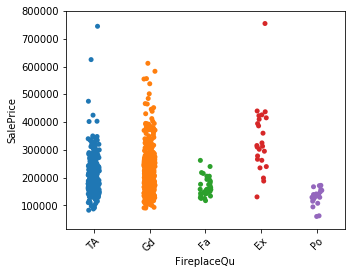

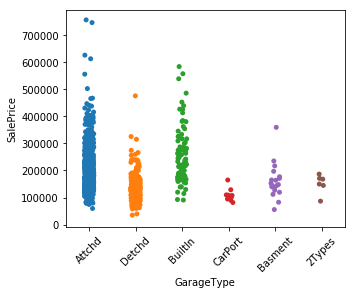

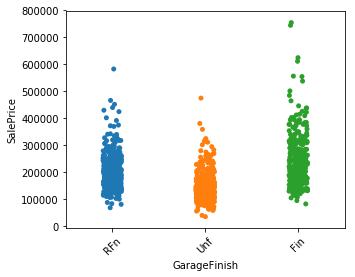

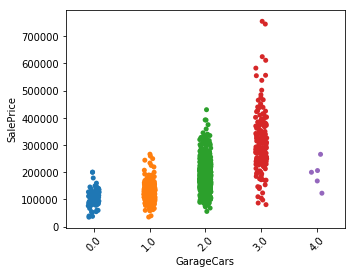

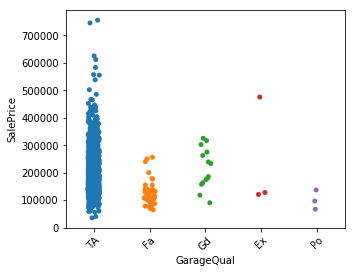

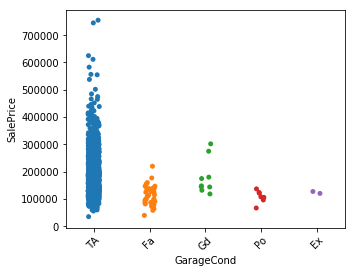

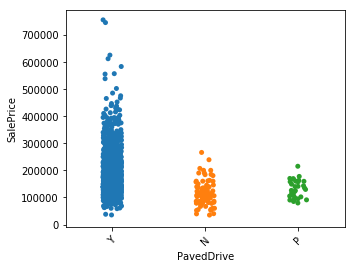

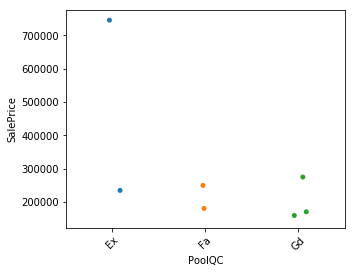

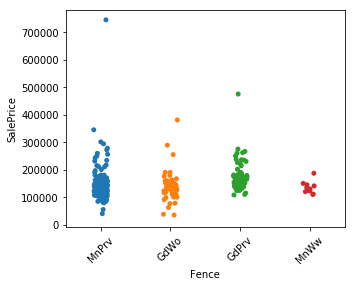

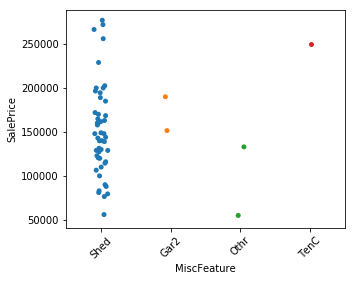

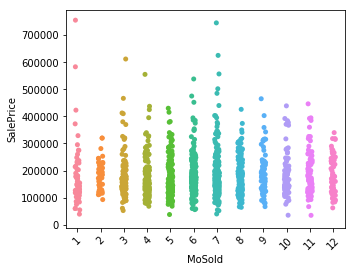

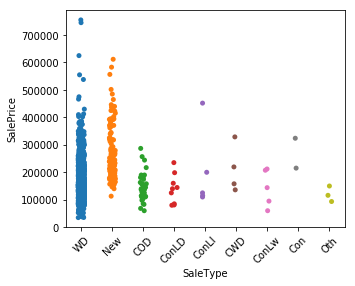

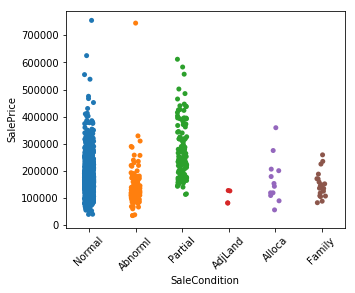

In [27]:
# Let's look at the plots for all our categorical variables now
plt.rcParams['figure.figsize'] = (5, 4)
for i in range(len(cat_of_interest)):
    chart = sns.stripplot(x = df_train[cat_of_interest[i]], y=df_train["SalePrice"])
    for item in chart.get_xticklabels():
        item.set_rotation(45)
    plt.show()
# An obvious stand-out correlation is between OverallQual and SalePrice. With each additional point for quality
# the graph climbs up!

In [28]:
# If we look at a feature like Foundation, there are a good number of observations for PConc, CBlock and BrkTil
# but for Wood, Slab and Stone there are only a very few observations and so we would expect that there
# is not much predictive value to be derived from those categories.
df["Foundation"].value_counts()

PConc     1308
CBlock    1235
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation, dtype: int64

In [29]:
# A different scenario is KitchenQual, where there are a fair number of observations in each category 
# (if a little skimpy on the "Fair" category and there is an obvious relationship to price in each case
df["KitchenQual"].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

### Investigating correlation pairs

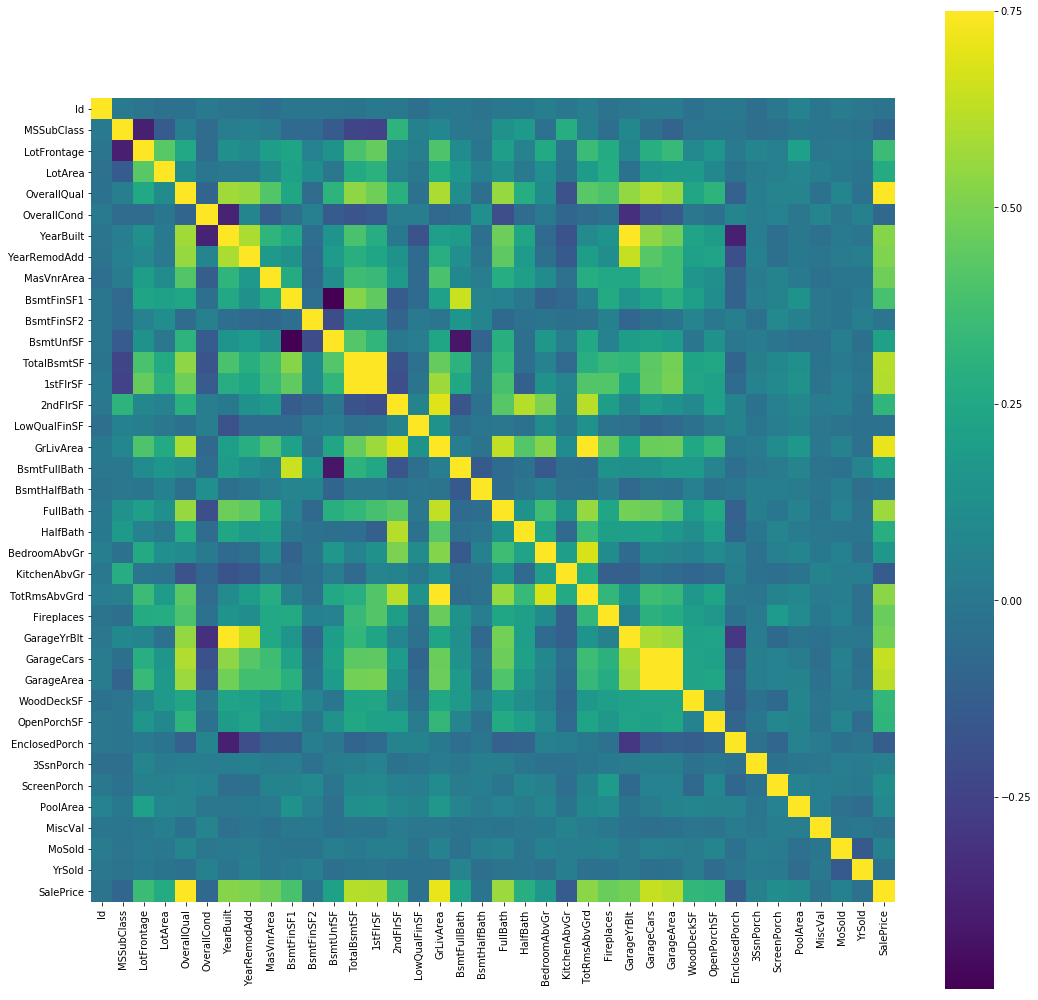

In [30]:
# Another very nifty tool for investigating correlations between variables is the heatmap
# Something to be aware of is that only numeric-valued items will be included here. So if, for example,
# you over-zealously converted variables like OverallQual to categorical variables up-front then
# they will not be included in this analysis!
corr_matrix = df_train.corr()
plt.subplots(figsize=(18, 18))
sns.heatmap(corr_matrix, cmap = "viridis", vmax = 0.75, square = True)
plt.show()

In [31]:
# Here we see highly correlated pairs (above 75% as requested) stand out in the pale colours.
# If we look along our SalePrice row, the stand-out variables are OverallQual, GrLivArea, 
# TotalBsmntSF and 1stFlrSF, GarageCars and Garage Area

# But think about this now... wouldn't the garage area actually determine the number of cars you can
# get in the garage? It would! These are variables that are actually highly correlated with each other
# which as we know would make it redundant to include both of them in our analysis.

# The same goes for YearBuilt and GarageYrBlt - it would appear that most houses, when built, start out
# with a Garage that was built at the same time. Another pair like this is TotalBsmntSF and 1stFlrSF - it
# stands to reason that the basement and the 1st floor would tend to be very similar in size because
# of the requirement for a foundation on which to rest, where the GrLivArea tends not to be as
# closely correlated as people build pergolas, porches, etc. which normally expand the ground floor living area.

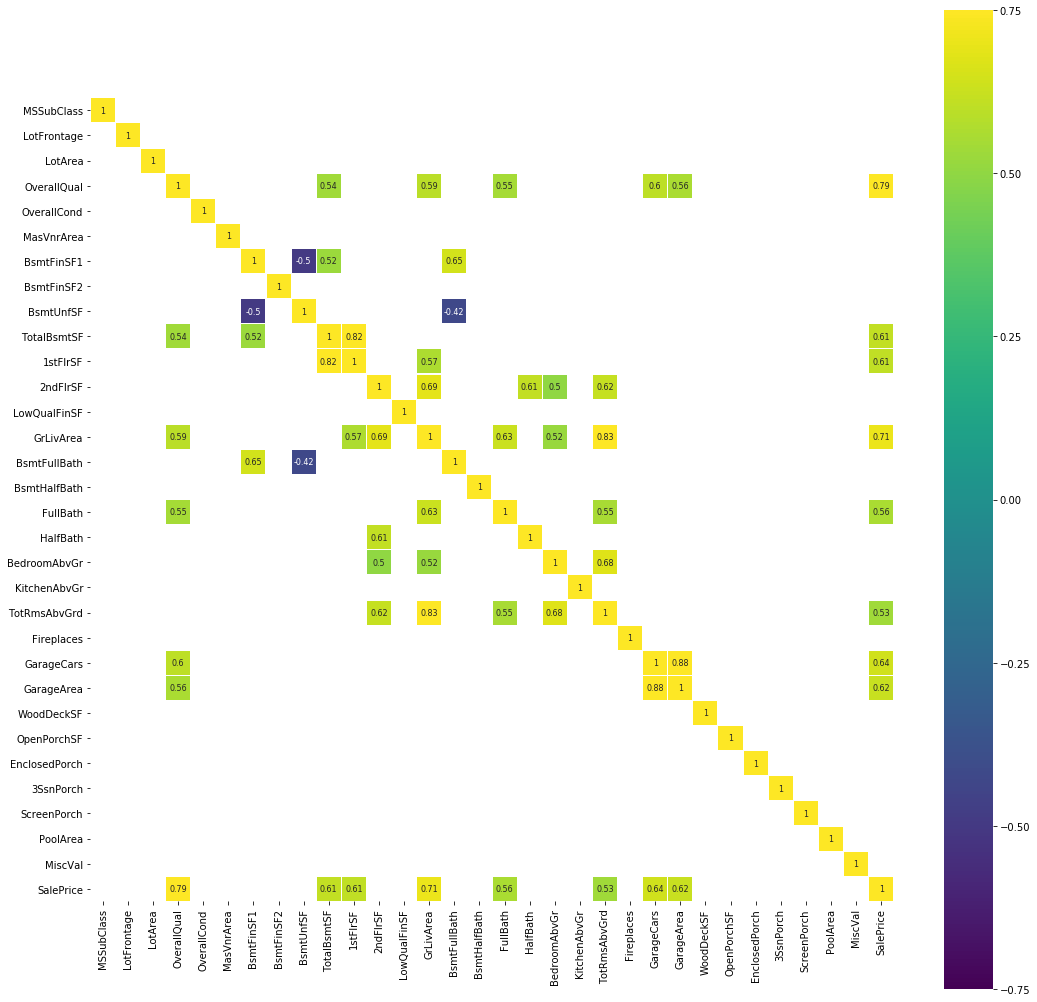

In [32]:
# The above gives a nice overview but it's a bit busy - we can enhance it to show only the
# "stand out" items - better! Let's also reduce the scope to only look at our true numerical data
corr_matrix = df_train[num_of_interest].corr()
plt.subplots(figsize=(18, 18))

sns.heatmap(corr_matrix[(corr_matrix >= 0.5) | (corr_matrix <= -0.4)], 
            cmap='viridis', vmax=0.75, vmin=-0.75, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

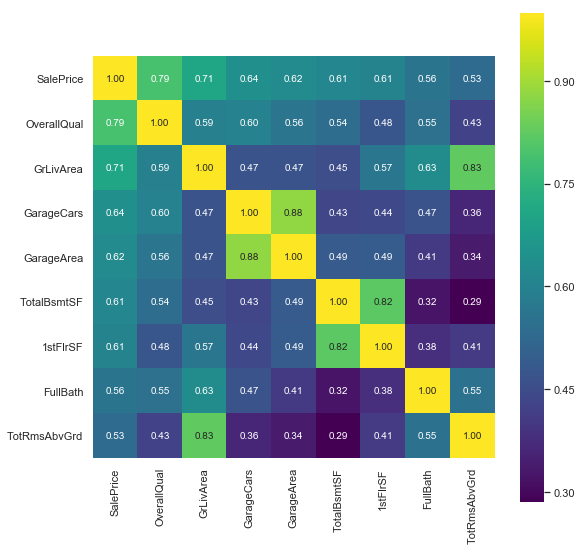

In [33]:
# Another nifty refinement on the heatmap is to plot the *best* correlations
# (with thanks to https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)
high_cols = corr_matrix.nlargest(9, "SalePrice")["SalePrice"].index
cm = np.corrcoef(df_train[high_cols].values.T)
plt.rcParams['figure.figsize'] = (9, 9)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cmap = "viridis", cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=high_cols.values, xticklabels=high_cols.values)
plt.show()

In [34]:
# It's also nice (sometimes!) to just look at the figures in the correlation matrix
# Just remember when looking that these are correlation co-efficients where 1 represents a strong
# postive correlation and -1 represents a strong negative correlation so don't just look at the top 10!
corr_rank = pd.DataFrame(corr_matrix["SalePrice"].sort_values(ascending = False)).reset_index()
corr_rank.style.background_gradient(cmap = "viridis", subset = "SalePrice")

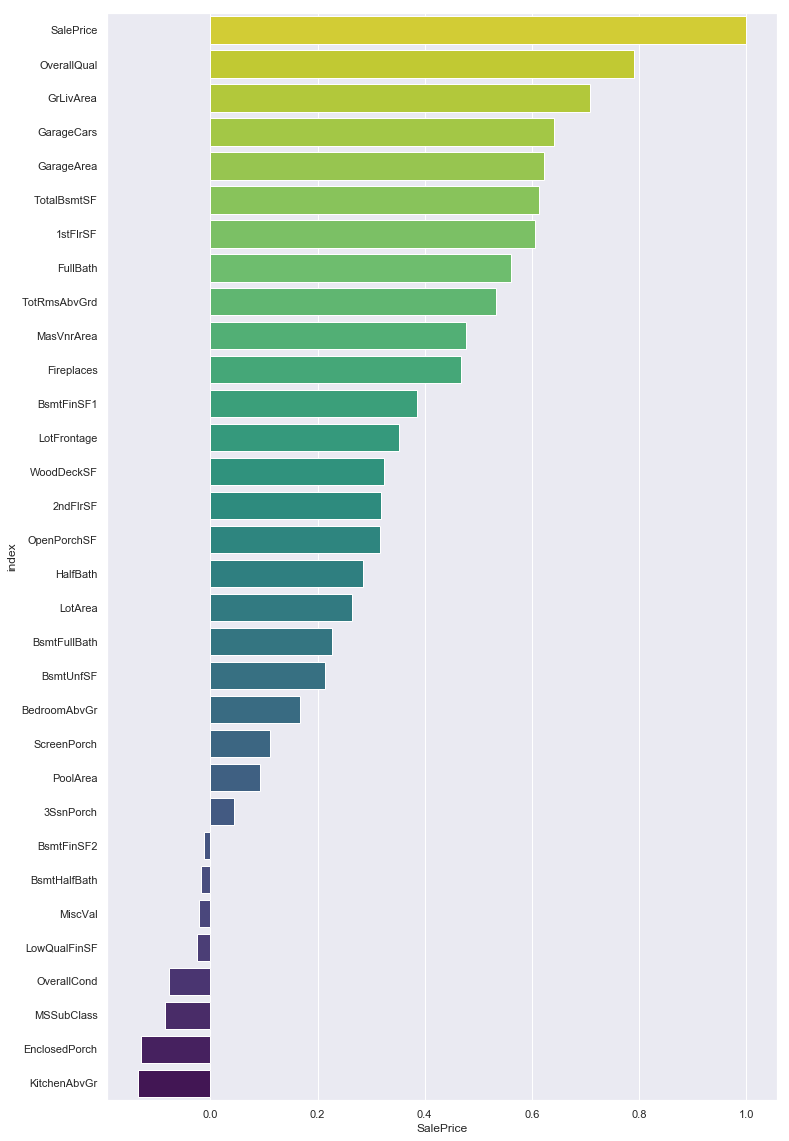

In [35]:
# And in a different graphic format this is what it boils down to
plt.subplots(figsize=(12, 20))
sns.barplot(x = "SalePrice", y = "index", data = corr_rank, palette = "viridis_r")
plt.show()

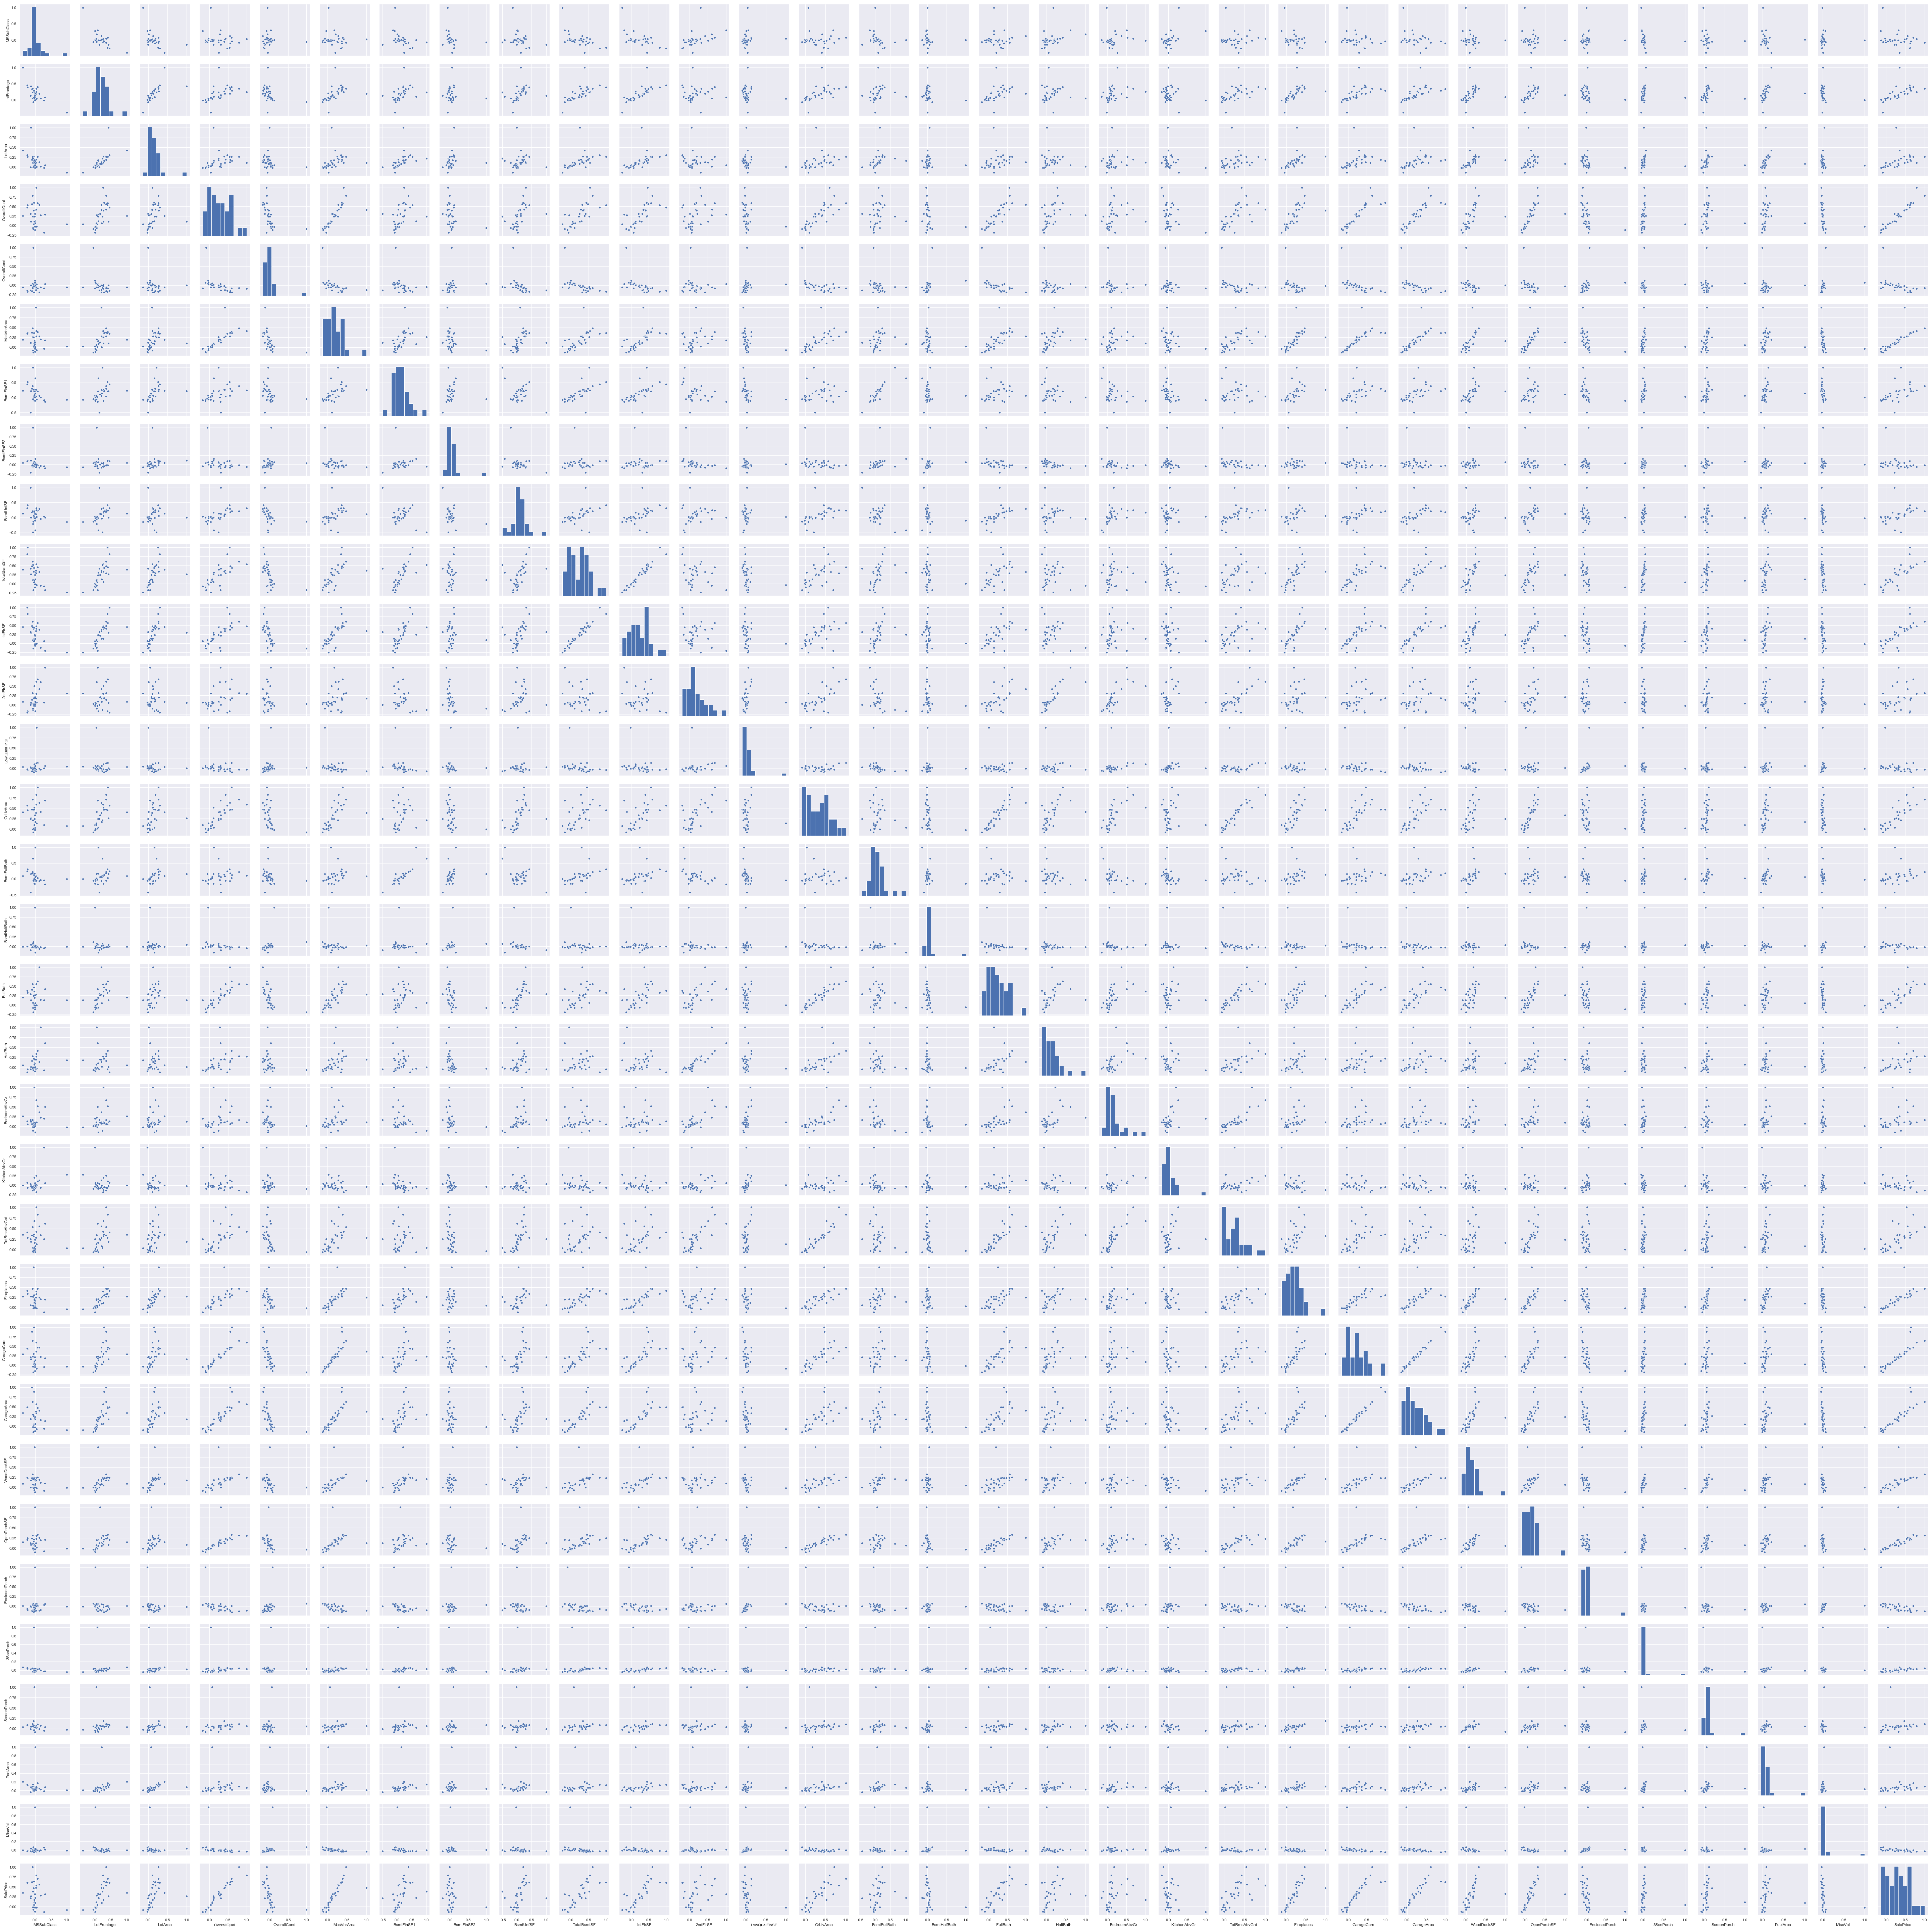

In [36]:
# For a more detailed view we can use the Seaborn pairplots (double-click to drill-down):
sns.pairplot(corr_matrix)
plt.show()

### And now to null values...

In [37]:
# Let's remind ourselves of the null value situation - this is worth creating a small function for
def na_totals(df):
    na_totals = df.isnull().sum().sort_values(ascending=False)
    return na_totals[na_totals > 0]
na_totals(df)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageYrBlt      159
GarageQual       159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
Utilities          2
Functional         2
BsmtHalfBath       2
BsmtUnfSF          1
GarageCars         1
BsmtFinSF1         1
SaleType           1
BsmtFinSF2         1
GarageArea         1
KitchenQual        1
TotalBsmtSF        1
Exterior2nd        1
Exterior1st        1
Electrical         1
dtype: int64

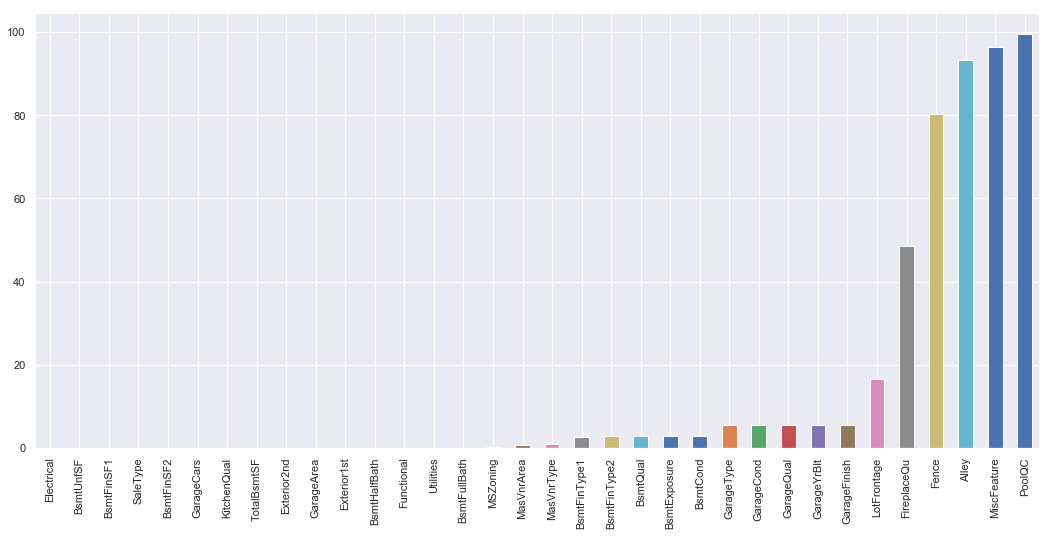

In [38]:
# Let's have a look visually at the % of missing values where applicable
plt.figure(figsize=(18,8))
missing_values = na_totals(df)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
ms=missing_values/df.shape[0]*100
ms.plot(kind='bar')
plt.show()
# The last 5 stood out for us as variables that should just be discarded as there are
# too many values missing for them even to be meaningful
# For the rest, it looks like when we get to data cleaning and pre-processing we'll be able
# to impute the missing values without too much difficult using median or mode at the simplest level

## Import required libraries and data

In [39]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import datetime
from scipy.stats import skew
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [40]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Create pre-processing function
The function also allows for any feature engineering (new fields) we might want to add into the mix in future

In [41]:
def data_preprocessing_pipeline(train,test,outliers,columns_to_drop,dependent_variable,skew_threshold):
    """Removes outliers, checks for skewness, drops less significant columns
        Works for Regression. It returns X_train, X_test and y
        
    Parameters:
    -----------
    train: A data frame of the training set.

    test: A data frame of the test set.

    outliers: A list of row indices of outliers.

    columns_to_drop: A list columns to drop.
    
    dependent_variable: Specify dependent variable
    
    skew_threshold: Threshold for the skew value
  
    """
    # Drop outliers
    train.drop(train.index[outliers],inplace=True)
    
    train_without_dependent = train.copy()
    train_without_dependent = train_without_dependent.drop(dependent_variable,axis=1)
    
    #train_without_dependent = train.drop(dependent_variable,axis=1,inplace=True)
    combined = pd.concat((train_without_dependent.loc[:],test.loc[:]))
        
    combined = combined.drop(columns_to_drop,axis=1)
    
    train[dependent_variable] = np.log1p(train[dependent_variable])
        
    feats = combined.dtypes[combined.dtypes != "object"].index
    skew_features = train[feats].apply(lambda x: skew(x.dropna()))
    skew_features = skew_features[skew_features > skew_threshold]
    skew_features = skew_features.index
        
    combined[skew_features] = np.log1p(combined[skew_features])
    combined = pd.get_dummies(combined)
    combined = combined.fillna(combined.mean())
        
    X_train = combined[:train.shape[0]]
    X_test = combined[train.shape[0]:]
    y = train[dependent_variable]
        
    return X_train,X_test,y

### Data pre-processing parameters
With acknowledgement to Nuwantha for research into outliers: https://github.com/Nuwantha/HousePricePredictionKaggle/blob/master/Algorithms/Gradient%20Boosting/gradient_boosting.py<br>
Columns to drop were just "top 5 with missing values<br>

In [42]:
outliers = [4,11,13,20,46,66,70,167,178,185,199, 224,261, 
           309,313,318, 349,412,423,440,454,477,478, 523,
           540, 581,588,595,654,688, 691, 774, 798, 875, 
           898,926,970,987,1027,1109, 1169,1182,1239, 1256,
           1298,1324,1353,1359,1405,1442,1447]
columns_to_drop = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']
skew_threshold = 0.75
dependent_variable = "SalePrice"

In [43]:
Xtrain,Xtest,ytrain = data_preprocessing_pipeline(train,test,outliers,columns_to_drop,dependent_variable,skew_threshold)

### Pre-select features for inclusion
Identified using on all features in GradientBoostRegressor() with feature.importance_ > 0 (see below regr_4.feature_importances_)

In [44]:
test_limited = [
"GrLivArea", 
"LotArea", 
"1stFlrSF", 
"GarageYrBlt", 
"TotalBsmtSF", 
"OverallQual", 
"GarageArea", 
"BsmtUnfSF", 
"YearBuilt", 
"BsmtFinSF1", 
"OverallCond", 
"EnclosedPorch", 
"LotFrontage", 
"WoodDeckSF", 
"OpenPorchSF", 
"YearRemodAdd", 
"MasVnrArea", 
"MoSold", 
"YrSold", 
"Neighborhood_BrkSide", 
"TotRmsAbvGrd", 
"Exterior1st_BrkFace", 
"ScreenPorch", 
"Functional_Typ", 
"SaleCondition_Abnorml", 
"SaleCondition_Normal", 
"2ndFlrSF", 
"Neighborhood_Crawfor", 
"Neighborhood_IDOTRR", 
"KitchenQual_Ex", 
"MSSubClass", 
"Condition1_Norm", 
"MSZoning_RL", 
"KitchenAbvGr", 
"PavedDrive_Y", 
"Neighborhood_Mitchel", 
"Fireplaces", 
"LotConfig_CulDSac", 
"Condition1_Artery", 
"BsmtFullBath", 
"HeatingQC_TA", 
"BsmtExposure_No", 
"BsmtCond_Fa", 
"Foundation_BrkTil", 
"Foundation_PConc", 
"CentralAir_N", 
"Neighborhood_Edwards", 
"LotShape_Reg", 
"ExterCond_TA", 
"PavedDrive_P", 
"SaleType_WD", 
"GarageFinish_RFn", 
"BedroomAbvGr", 
"HalfBath", 
"Electrical_FuseA", 
"GarageCars", 
"BsmtFinSF2", 
"GarageType_Attchd", 
"BsmtExposure_Gd", 
"Exterior1st_MetalSd", 
"Neighborhood_NoRidge", 
"Neighborhood_Somerst", 
"Exterior1st_Wd Sdng", 
"BsmtHalfBath", 
"RoofStyle_Hip", 
"BsmtFinType1_Rec", 
"HouseStyle_1Story", 
"SaleCondition_Partial", 
"LotShape_IR2", 
"LandContour_HLS", 
"LotConfig_Inside", 
"Neighborhood_Sawyer", 
"BsmtFinType1_ALQ", 
"MSZoning_FV", 
"Foundation_CBlock", 
"BsmtQual_Ex", 
"HouseStyle_SLvl", 
"Neighborhood_CollgCr", 
"Exterior1st_Plywood", 
"BsmtQual_Gd", 
"GarageFinish_Fin", 
"LotConfig_FR2", 
"Neighborhood_OldTown", 
"MSZoning_RM", 
"BsmtQual_Fa", 
"BsmtFinType2_BLQ", 
"KitchenQual_TA", 
"GarageQual_TA", 
"ExterCond_Gd", 
"HeatingQC_Ex", 
"BsmtCond_TA", 
"GarageCond_TA", 
"GarageType_BuiltIn", 
"BsmtFinType2_Rec", 
"RoofStyle_Gable", 
"HeatingQC_Fa", 
"Neighborhood_NAmes", 
"BsmtExposure_Av", 
"MasVnrType_BrkFace", 
"CentralAir_Y", 
"LandContour_Lvl", 
"SaleType_New", 
"GarageCond_Fa", 
"BsmtFinType1_GLQ", 
"PavedDrive_N", 
"BsmtQual_TA", 
"ExterQual_TA", 
"BsmtFinType1_Unf", 
"Electrical_SBrkr", 
"MiscVal", 
"Exterior1st_HdBoard", 
"LandSlope_Gtl", 
"BldgType_Duplex", 
"GarageFinish_Unf", 
"BldgType_1Fam", 
"LandSlope_Mod", 
"Neighborhood_NridgHt", 
"GarageType_Detchd", 
"Neighborhood_Timber", 
"Exterior2nd_HdBoard", 
"Functional_Min2", 
"LotConfig_Corner", 
"FullBath"
]
Xtrain = Xtrain[test_limited].copy()
X_test = Xtest[test_limited].copy()

## Build the evaluation models & get results
Key references used for model selection and parameter tuning:
#### LinearRegression
Chosen initially because it's the obvious candidate - we all expected it to perform quite poorly in comparison with other models, and against all expectations it turned out to be one of the best!
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
#### TheilSenRegressor
Chosen for the promise of being "robust" against outliers http://scikit-learn.org/stable/auto_examples/linear_model/plot_theilsen.html#sphx-glr-auto-examples-linear-model-plot-theilsen-py
#### GradientBoostingRegressor
Chosen as it turned out to be a good performer AND provides output on feature_importances_ which was used later to reduce the number of features included for analysis
https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
#### Ridge
This was our top-performing individual model
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

#### Additional (poorer-performing) models evaluated prior to final selection
- SVR
- RandomForest
- XGBoost

In [45]:
# Perform the train / test split
X_train, X_val, y_train, y_val = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=0)

In [46]:
# Function to return RMSE (root mean squared error)
def rms(Y_tets, Y_pred):
    return np.sqrt(mean_squared_error(Y_tets, Y_pred))

In [63]:
# Function to create submission file
def submission_csv(pred, score):
    current_time = datetime.datetime.now()
    submission_csv = 'kaggle_submission_'+str(score)+'_'+str(current_time.strftime('%Y-%m-%d-%H-%M'))+'.csv'
    df=pd.DataFrame({'Id': test['Id'].values, 'SalePrice': pred})
    df.to_csv(submission_csv, index=False)
    print('Submission: '+submission_csv+' created.')

In [48]:
# Functions to run the train / validation combinations
def model_lrt(X_train,X_val,X_test, y_train, y_val):
    start_time = datetime.datetime.now()
    regr_model = LinearRegression()
    regr_model.fit(X_train, y_train)
    y_val_pred = regr_model.predict(X_val)
    score = rms(y_val, y_val_pred)
    y_test_pred = regr_model.predict(X_test)
    end_time = datetime.datetime.now()
    print('Training Done..., Time Cost: %d' % ((end_time - start_time).seconds))
    print('Linear Regression val score: '+ str(score))
    
    return y_test_pred, score 
    
def model_gbrt(X_train,X_val,X_test, y_train, y_val):
    start_time = datetime.datetime.now()
    regr_model = GradientBoostingRegressor(min_samples_split = 50, max_depth=3, min_samples_leaf = 30, 
                          n_estimators=400, random_state=None, learning_rate = 0.05)
    regr_model.fit(X_train, y_train)
    y_val_pred = regr_model.predict(X_val)
    score = rms(y_val, y_val_pred)
    y_test_pred = regr_model.predict(X_test)
    end_time = datetime.datetime.now()
    print('Training Done..., Time Cost: %d' % ((end_time - start_time).seconds))
    print('GradientBoostingRegressor val score: '+ str(score))
    
    return y_test_pred, score 
  

def model_tsrt(X_train,X_val, X_test, y_train, y_test):
    start_time = datetime.datetime.now()
    regr_model = TheilSenRegressor(random_state=42)
    regr_model.fit(X_train, y_train)
    y_val_pred = regr_model.predict(X_val)
    score = rms(y_val, y_val_pred)
    y_test_pred = regr_model.predict(X_test)
    end_time = datetime.datetime.now()
    print('Training Done..., Time Cost: %d' % ((end_time - start_time).seconds))
    print('TheilSenRegressor val score: '+ str(score))
    
    return y_test_pred, score

def model_rgt(X_train,X_val,X_test, y_train, y_test):
    start_time = datetime.datetime.now()
    regr_model = Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
                   normalize=False, random_state=None, solver='auto', tol=0.001)
    regr_model.fit(X_train, y_train)
    y_val_pred = regr_model.predict(X_val)
    score = rms(y_val, y_val_pred)
    y_test_pred = regr_model.predict(X_test)
    end_time = datetime.datetime.now()
    print('Training Done..., Time Cost: %d' % ((end_time - start_time).seconds))
    print('Ridge val score: '+ str(score))
    
    return y_test_pred, score

def model_lgbt(X_train,X_val,X_test, y_train, y_test):
    start_time = datetime.datetime.now()
    myLGB = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=600,
                              max_bin = 50, bagging_fraction = 0.6,
                              bagging_freq = 5, feature_fraction = 0.25,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf = 6, min_sum_hessian_in_leaf = 11)
    myLGB.fit(X_train, y_train)
    y_val_pred = myLGB.predict(X_val)
    score = rms(y_val, y_val_pred)
    y_test_pred = myLGB.predict(X_test)
    end_time = datetime.datetime.now()
    print('Training Done..., Time Cost: %d' % ((end_time - start_time).seconds))
    print('Ridge val score: '+ str(score))
    
    return y_test_pred, score

In [49]:
# Run the models

In [50]:
y_pred_lr, score_lr = model_lrt(X_train,X_val, X_test, y_train, y_val)

Training Done..., Time Cost: 0
Linear Regression val score: 0.10169953254453117


In [51]:
y_pred_gbr, score_gbr = model_gbrt(X_train,X_val, X_test, y_train, y_val)

Training Done..., Time Cost: 1
GradientBoostingRegressor val score: 0.10970323888996183


In [52]:
y_pred_tsr, score_tsr = model_tsrt(X_train,X_val, X_test, y_train, y_val)

Training Done..., Time Cost: 35
TheilSenRegressor val score: 0.10440934300772127


In [53]:
y_pred_rg, score_rg = model_rgt(X_train,X_val, X_test, y_train, y_val)

Training Done..., Time Cost: 0
Ridge val score: 0.10090004744250328


## Do final training & prepare for submission
We train on the full dataset once we're happy with the scores obtained in testing to maximize results on the Kaggle test dataset.

In [54]:
# Create the models for final training before submission

def model_lrf(Xtrain,X_test,ytrain):
    start_time = datetime.datetime.now()
    regr_model = LinearRegression()
    regr_model.fit(Xtrain, ytrain)
    y_test_pred = regr_model.predict(X_test)
    end_time = datetime.datetime.now()
    print('Training Done..., Time Cost: %d' % ((end_time - start_time).seconds))
    
    return y_test_pred
    
def model_gbrf(Xtrain,X_test,ytrain):
    start_time = datetime.datetime.now()
    regr_model = GradientBoostingRegressor(min_samples_split = 50, max_depth=3, min_samples_leaf = 30, 
                          n_estimators=400, random_state=None, learning_rate = 0.05)
    regr_model.fit(Xtrain, ytrain)
    y_test_pred = regr_model.predict(X_test)
    end_time = datetime.datetime.now()
    print('Training Done..., Time Cost: %d' % ((end_time - start_time).seconds))
    
    return y_test_pred
    

def model_tsrf(Xtrain,X_test,ytrain):
    start_time = datetime.datetime.now()
    regr_model = TheilSenRegressor(random_state=42)
    regr_model.fit(Xtrain, ytrain)
    y_test_pred = regr_model.predict(X_test)
    end_time = datetime.datetime.now()
    print('Training Done..., Time Cost: %d' % ((end_time - start_time).seconds))
    
    return y_test_pred
    
def model_rgf(Xtrain,X_test,ytrain):
    start_time = datetime.datetime.now()
    regr_model = Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
                   normalize=False, random_state=None, solver='auto', tol=0.001)
    regr_model.fit(Xtrain, ytrain)
    y_test_pred = regr_model.predict(X_test)
    end_time = datetime.datetime.now()
    print('Training Done..., Time Cost: %d' % ((end_time - start_time).seconds))
    
    return y_test_pred
    

def model_lgbf(Xtrain,X_test,ytrain):
    start_time = datetime.datetime.now()
    regr_model = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=600,
                              max_bin = 50, bagging_fraction = 0.6,
                              bagging_freq = 5, feature_fraction = 0.25,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf = 6, min_sum_hessian_in_leaf = 11)
    regr_model.fit(Xtrain, ytrain)
    y_test_pred = regr_model.predict(X_test)
    end_time = datetime.datetime.now()
    print('Training Done..., Time Cost: %d' % ((end_time - start_time).seconds))
    
    return y_test_pred

In [55]:
y_pred_lrf = model_lrf(Xtrain,X_test,ytrain)

Training Done..., Time Cost: 0


In [56]:
y_pred_gbrf = model_gbrf(Xtrain,X_test,ytrain)

Training Done..., Time Cost: 2


In [57]:
y_pred_tsrf = model_tsrf(Xtrain,X_test,ytrain)

Training Done..., Time Cost: 30


In [58]:
y_pred_rgf = model_rgf(Xtrain,X_test,ytrain)

Training Done..., Time Cost: 0


## Putting it all together
We used a very simple "ensembling" technique of putting 3 of our models together and averaging. We tried stacking and blending but did not obtain better results: keeping it simple was the winner in the end.

In [64]:
# The ensemble of just 3 of our models actually performs best! 0.11613
submission_csv((np.exp(y_pred_lrf)+np.exp(y_pred_gbrf)+np.exp(y_pred_rgf))/3, 0)

Submission: kaggle_submission_0_2018-09-06-15-14.csv created.


In [59]:
# The ensemble of all 4 was *slightly* poorer at 0.11614
# submission_csv((np.exp(y_pred_lrf)+np.exp(y_pred_gbrf)+ np.exp(y_pred_tsrf)+np.exp(y_pred_rgf))/4, score_lr)

Submission: kaggel_submission_0.10169953254453117_2018-09-06-14-43.csv created.


### A quick look at feature importances after modelling
These were used as input to our final model (see above). As a team we feel that we could better balance the amount of time we spend on feature engineering and fine-tuning the models.

In [60]:
regr_4 = GradientBoostingRegressor(min_samples_split = 50, max_depth=3, min_samples_leaf = 30, 
                          n_estimators=400, random_state=None, learning_rate = 0.05)
regr_4.fit(X_train, y_train)
y_4 = regr_4.predict(X_test)
feature_weights_4 = pd.DataFrame(X_train.columns)
feature_weights_4["Weighting"] = regr_4.feature_importances_

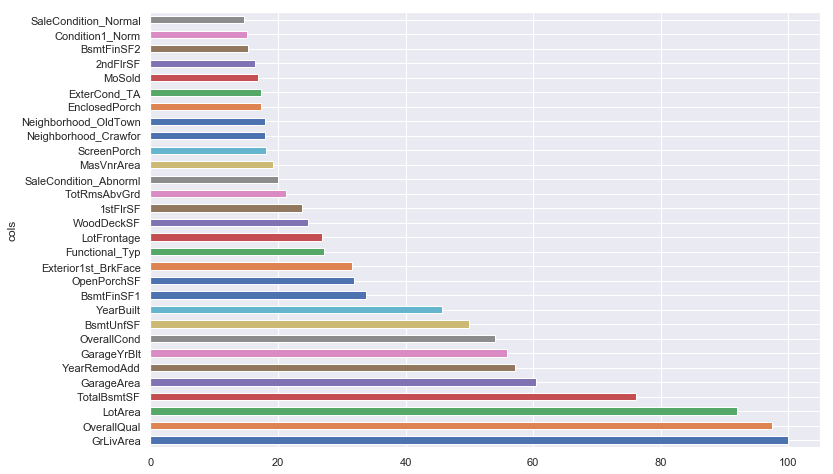

In [61]:
def rf_feat_importance(m, df,count):
    feature_importance = regr_4.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    fi = pd.DataFrame({'cols':df.columns, 'imp':feature_importance}
                       ).sort_values('imp', ascending=False)
    def plot_fi(fi):
        return fi.plot('cols', 'imp', 'barh', figsize=(12,8), legend=False)

    return plot_fi(fi[:count]) , fi

plot, df = rf_feat_importance(regr_4, Xtrain,30)